<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Convolu%C3%A7%C3%A3o%20Discreta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação manual da convolução entre dois sinais discretos e da plotagem do resultado.

In [156]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck

plt.style.use('ggplot')

In [157]:
def manual_convolution(x_n1, x_n2):
    # Definition of the result list
    result = []
    #Size of convolution result list
    result_len = len(x_n1)+len(x_n2)-1 
    
    for n in range(result_len):
        aux_sum = 0
        for k in range(len(x_n1)):
            # Guarantee taht there is no overlaps
            if (n-k >= 0) and (len(x_n2) > n-k):
                # Convolution's definition
                aux_sum += x_n1[k] * x_n2[n-k] 
        
        # Add the step result to the result list
        result.append(aux_sum)

    return result

def convolution_plotter(x_n1, n1, x_n2, n2):

  # Define the first index for the convolution plotting
  if(n1[0]<n2[0]):
    start_index = (n1[0]-n2[0])
  else:
    start_index = (n2[0]-n1[0])

  # Executing the convolution
  #y_n = np.convolve(x_n1, x_n2)
  y_n = manual_convolution(x_n1, x_n2)
  n3 = list(range(start_index, len(y_n)+(start_index)))

  # Plotting results
  plt.rcParams['figure.figsize'] = (15, 3)

  plt.subplot(1,3,1)
  plt.title("$x[n]$")
  plt.stem(n1, x_n1, 'b',use_line_collection=True)

  plt.subplot(1,3,2)
  plt.title("$x[n+3]$")
  plt.stem(n2, x_n2, 'b',use_line_collection=True)

  plt.subplot(1,3,3)
  plt.title("$y[n] = x[n]*x[n+3]$")
  plt.stem(n3, y_n, 'b',use_line_collection=True)

  plt.tight_layout()
  plt.show()

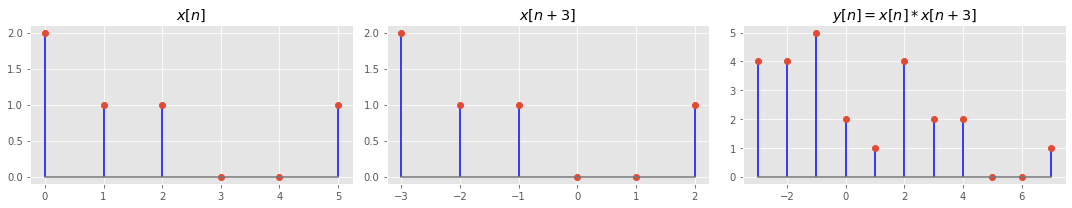

In [158]:
# Make sure to don't include any zero sample value before the first non-zero sample
# Example: Invalid samples array: [0,0,1,0,-2,0,0] | It should look like: [1,0,-2,0,0]

# Set first set of samples (x_n1 = value of the samples | n1 = indexes)
x_n1 = [2,1,1,0,0,1]
n1 = [0,1,2,3,4,5]

# Set second set of samples (x_n2 = value of the samples | n2 = indexes)
x_n2 = [2,1,1,0,0,1]
n2 = [-3,-2,-1,0,1,2]

convolution_plotter(x_n1,n1,x_n2,n2)